# Data Analysis Examples

## 14.1 USA.gov from Bitly

In [3]:
# we are going to work with JSON data in this example.
# first we define a path that refer to our JSON file.

path = r'C:\Users\Sade\Documents\JupyterCalismalari\datasets\example.txt'

# open the file and readlines

open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [8]:
# import json library to read lines with json module

import json 
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

## Counting Time Zones in Pure Python

In [10]:
# we are going to try to find to most frequent time-zones in the dataset.
times_zone = [rec['tz'] for rec in records]

KeyError: 'tz'

In [11]:
# the reason why we are getting an error is that not all the records have a time-zone field. we will 
# add if 'tz' in rec at the and of the our code.

time_zones = [rec['tz'] for rec in records if 'tz' in rec]

time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [21]:
# to produce counts by time zone. We are going to use 2 method one with using just the standart python
# library and the other one using pandas.

# One way to do the counting is to use a dict to store counts of the time-zones.
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts
# one easier method to find most-common time-zones is to use collections.counter
from collections import Counter

counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

## Counting Time Zones with pandas

In [24]:
# to crate a dataframe from out data, we pass to dataframe to pandas.

import pandas as pd
frame = pd.DataFrame(records)
frame.info() # to get columns dtypes and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [25]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [28]:
# It could be used for frame['tz'] Series to find the value_counts.

tz_counts = frame['tz'].value_counts()
tz_counts

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
                       ... 
Africa/Lusaka             1
America/La_Paz            1
Asia/Kuching              1
Asia/Nicosia              1
America/Montevideo        1
Name: tz, Length: 97, dtype: int64

In [29]:
# Using mathplotlib the data can be visualized. a bit munging to fill missing values also possible.
clean_tz = frame['tz'].fillna('Missing') # filling the missing values
clean_tz[clean_tz == ''] = 'Unknown' # sustitute value for unknowns
tz_counts = clean_tz.value_counts() # value counts
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<AxesSubplot:>

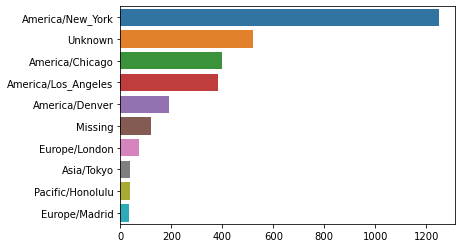

In [34]:
# now we are going to use Seaborn library to make a horizontal.
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y = subset.index, x = subset.values)

In [35]:
# The a field in out dataset contains informations about browser, device ext.
frame['a'][1]

'GoogleMaps/RochesterNY'

In [37]:
frame['a'][50][:50] # long line

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/2010'

In [38]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()]) # splitting x for all non-null values
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [39]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [49]:
# Now suppose you wanted to decompose the top time zones into Windows and non-Windows users.
import numpy as np
cframe = frame[frame['a'].notnull()]
cframe
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows') #numpy.where (condition , x , y)
cframe['os'][:5]

<ipython-input-49-cb403d33f530>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cframe['os'] = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows') #numpy.where (condition , x , y)


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [65]:
# now, we could easily group the data by its time zone.

by_tz_os = cframe.groupby(['tz', 'os'])

agg_counts = by_tz_os.size().unstack().fillna(10) # we arrange the final data we get by the group operation.
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,10.0,3.0
Africa/Casablanca,10.0,1.0
Africa/Ceuta,10.0,2.0
Africa/Johannesburg,10.0,1.0
Africa/Lusaka,10.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,10.0
America/Argentina/Cordoba,10.0,1.0


In [122]:
indexer = agg_counts.sum(1).argsort() # we construct and indirect index array from th row counts in agg_counts

indexer

tz
                       84
Africa/Cairo           13
Africa/Casablanca      48
Africa/Ceuta           73
Africa/Johannesburg    68
                       ..
Europe/Volgograd       15
Europe/Warsaw          22
Europe/Zurich          12
Pacific/Auckland        0
Pacific/Honolulu       29
Length: 97, dtype: int64

In [123]:
count_subset = agg_counts.take(indexer[-10:])

In [81]:
agg_counts.sum(1).nlargest(10) # we tried to find top overall time zones

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Pacific/Honolulu         46.0
Asia/Tokyo               37.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [137]:
count_subset

tz                   os         
America/Sao_Paulo    Not Windows     13.0
                     Windows         20.0
Europe/Madrid        Not Windows     16.0
                     Windows         19.0
Asia/Tokyo           Not Windows      2.0
                     Windows         35.0
Pacific/Honolulu     Not Windows     10.0
                     Windows         36.0
Europe/London        Not Windows     43.0
                     Windows         31.0
America/Denver       Not Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not Windows    130.0
                     Windows        252.0
America/Chicago      Not Windows    115.0
                     Windows        285.0
                     Not Windows    245.0
                     Windows        276.0
America/New_York     Not Windows    339.0
                     Windows        912.0
Name: total, dtype: float64

In [125]:
count_subset = count_subset.stack()

In [136]:
count_subset.name = 'total'

In [140]:
# those can be plotted in a bar plot. we use stacked bar plot by passing additional arguments.


count_subset = count_subset.reset_index()

In [141]:
count_subset[:10] #rearrange data as our neccessity

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Asia/Tokyo,Not Windows,2.0
5,Asia/Tokyo,Windows,35.0
6,Pacific/Honolulu,Not Windows,10.0
7,Pacific/Honolulu,Windows,36.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<AxesSubplot:xlabel='total', ylabel='tz'>

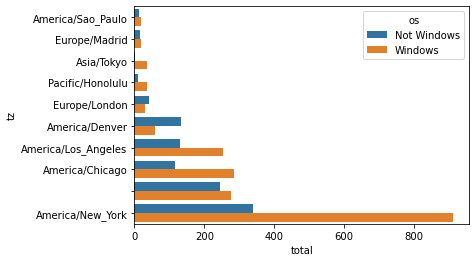

In [111]:
sns.barplot(x = 'total', y = 'tz', hue = 'os', data =count_subset)

In [142]:
# too see easier relative pecentage of Windows users in smaller group. normalize the group percentage.

def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group



In [143]:
results = count_subset.groupby('tz').apply(norm_total)

<AxesSubplot:xlabel='normed_total', ylabel='tz'>

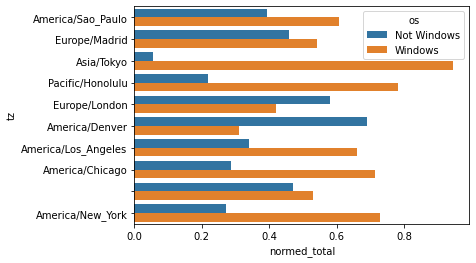

In [144]:
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

## 14.2 MovieLens 1M Dataset 

In [145]:
# this data set consists of 3 tables and contains about 1M data. We won't explore any ML techniques
# while we are wrangling with data.

import pandas as pd

pd.options.display.max_row = 10 # make display smaller

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table(r"C:\Users\Sade\Documents\JupyterCalismalari\datasets\users.dat.txt" , sep = '::',
                         header = None, names = unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(r"C:\Users\Sade\Documents\JupyterCalismalari\datasets\ratings.dat.txt", sep='::',
 header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table(r"C:\Users\Sade\Documents\JupyterCalismalari\datasets\movies.dat.txt", sep='::',
 header=None, names=mnames)

# we accessed the data.



<ipython-input-145-43c9a20214be>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table(r"C:\Users\Sade\Documents\JupyterCalismalari\datasets\users.dat.txt" , sep = '::',
<ipython-input-145-43c9a20214be>:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table(r"C:\Users\Sade\Documents\JupyterCalismalari\datasets\ratings.dat.txt", sep='::',
<ipython-input-145-43c9a20214be>:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid th

In [146]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [148]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [150]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [151]:
# analysing the data spread across tables is a compplicated task, for example you wanted to
# compute mean ratings for a particular movie by sex and age. this operation would be much easier with
# all of the data merged together into a single table.

# we first merge ratings with users and then result with the movies data.

data = pd.merge(pd.merge(ratings,users),movies)
data


,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [154]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [155]:
# we will use pivot_table method to get mean movie ratings for each film grouped by gender.

mean_ratings = data.pivot_table('rating', index = 'title', columns = 'gender', aggfunc = 'mean')
mean_ratings[:5] # this table gives us the ratings with the gender on column and title in rows.

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [157]:
# now we filter down to movies that received at least 250 ratings; to do this we group the data by
# title and use size() to get a series.

ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [160]:
active_titles = ratings_by_title.index[ratings_by_title > 250] # where we get above 250 ratings
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1214)

In [161]:
# those indexes can be used to select rows from mean_ratings

mean_ratings = mean_ratings.loc[active_titles] # we pass indexes 

mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [164]:
# we can easily sort to see the most popular films among female viewers.

top_female_ratings = mean_ratings.sort_values(by = 'F', ascending = False)

top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### Measuring Rating Disagreement

In [168]:
# if we want to find the most seperator film between male and female viewers. One way to 
# add a new column which refers to difference between different types of viewers.

mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

# the next point will be sort the DataFrame according to diff column with.

sorted_by_diff = mean_ratings.sort_values(by = 'diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [171]:
# Reverse the order of the roww shows us the movies preffered by men that women didn't rate as high
# men did.

sorted_by_diff[::1][:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [184]:
# we could calculate independent of gender disaggrement, dissagrement can be measured by the variance
# or standart deviation of the ratings.

rating_std_by_title = data.groupby('title')['rating'].std() #standart deviation of rating grouped by title

#Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]

rating_std_by_title[:1]

title
'burbs, The (1989)    1.10776
Name: rating, dtype: float64

## 14.3 Us Baby Names 1880-2010

In [185]:
# Amerika Sosyal Güvenlik Yönetim Kurulu 1800den bu yana çocukların isimlerinin
# frekanslarına ait dataları yayınlamış. Şimdi bu datalar ile bir wrangling
# çalışması yapacağız.

import pandas as pd

names1880 = pd.read_csv(r"C:\Users\Sade\Documents\JupyterCalismalari\datasets\babynames\yob1880.txt",
                       names = ['names','sex', 'births'])

names1880

,names,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [187]:
# yukarıdaki liste en az 5 doğumlu bir tablo veriyor dataları cinsiyete göre
# gruplamak bize erkek ve kadın doğum değerleriyle alakalı bir sonuç 
# çıkaracaktır.

names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [214]:
# bütün datalar yıl bazında tek bir dosyada toplandığı için yapılacak ilk iş
# bütün dataları bir DataFrame üzerinde toplamak olacaktır ve bir year kolonu
# altında bunu tagleyebiliriz.

years = range(1880,2011)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = r"C:\Users\Sade\Documents\JupyterCalismalari\datasets\babynames\yob%d.txt" %year
    frame = pd.read_csv(path, names =columns)

    frame['year'] = year
    pieces.append(frame)

# bütün piecesleri concat ediyoruz.
names = pd.concat(pieces, ignore_index= True)


In [215]:
# burda dikkat edilmesi gereken iki husus vardır.
# birincisi concat ile dataframeleri birbirine satır bazlı uç uca ekledik.
# ikincisi ingore_index=True ile orjinal dataframelerden gelen indexlerle ilgilenmediğimiz içim
# işlem yaptık.

names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [216]:
# elimizdeki bu datayla gruplama işlemlerine yıl ve cinsiyet bazlı olarak başlayabiliriz.

total_births = names.pivot_table('births', index = 'year', columns = 'sex', aggfunc = sum)

# bunun için indexleri yıldan kolonları cinsiyetlerden ve toplam doğum sayısını veren 
# bir pivot table oluşturduk.

total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


<AxesSubplot:title={'center':'Cinsiyet ve yıla göre toplam doğum sayıları'}, xlabel='year'>

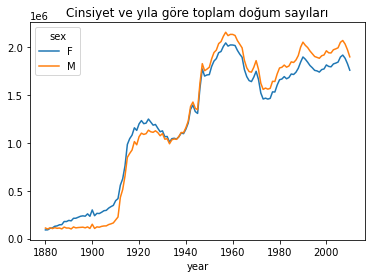

In [217]:
total_births.plot(title = 'Cinsiyet ve yıla göre toplam doğum sayıları')

In [218]:
# şimdi bir prop kolonu ekleyerek verilen spesifik ismin toplan isimlere göre
# oranını bulalım. Bunun için bir add_prop fonksiyonu tanımlayacağız.
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [220]:
# bir sanity check yaparak değerlerin toplamının 1 olduğunu teyit ediyoruz.

names.groupby(['sex', 'year']).prop.sum()

sex  year
F    1880    1.0
     1881    1.0
     1882    1.0
     1883    1.0
     1884    1.0
            ... 
M    2006    1.0
     2007    1.0
     2008    1.0
     2009    1.0
     2010    1.0
Name: prop, Length: 262, dtype: float64

In [222]:
# Şimdi oranlara baktıktan sonra datanın daha da içine girebilmek için top 1000
# ismi alalım.

def get_top1000(group):
    return group.sort_values(by = 'births' , ascending = False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.reset_index(inplace = True, drop = True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


### Analyzing Naming Trends

In [230]:
# elimizdeki bütün dataset ve top1000 data seti ile çeşitli isimlerde analiz 
# yapabiliriz. İlk akla geleni top1000 içerisinde cinsiyete göre ayırmak olacaktır.

boys = top1000[top1000['sex'] == 'M']
girls = top1000[top1000['sex'] == 'F']


In [232]:
# basit zaman serileri john ve marynin her yıla göre sayısı plot edilebilir.
# ancak biraz datayı düzenlemek gerekcektir.

total_births = top1000.pivot_table('births', index = 'year', columns = 'name',
                                   aggfunc = sum ) 
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

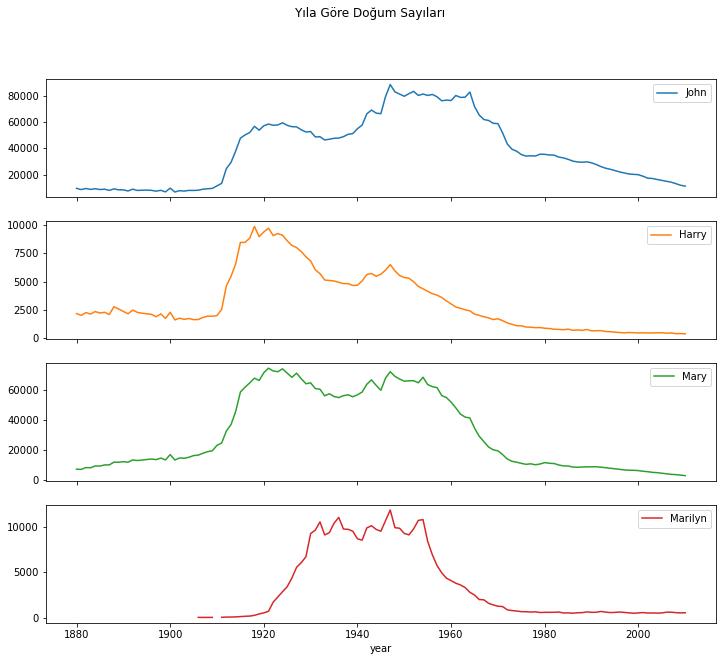

In [245]:
# dataframe şimdi subset alarak görselleştirilebilir.

subset = total_births[['John','Harry','Mary', 'Marilyn']]
subset.plot(subplots = True, figsize = ( 12, 10), grid = False, title = 'Yıla Göre Doğum Sayıları')

#### Measuring the increase in naming diversity

In [246]:
# grafikleri yorumlamak gerekirse gün geçtikçe daha az aile çocuklarına
# yaygın isimler veriyor. Cinsiyete ve yıla göre gruplanmış, top1000deki doğum
# oranları bunu gösteren bir ölçüdür.

table = top1000.pivot_table('prop', index = 'year', columns = 'sex', aggfunc = sum)
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

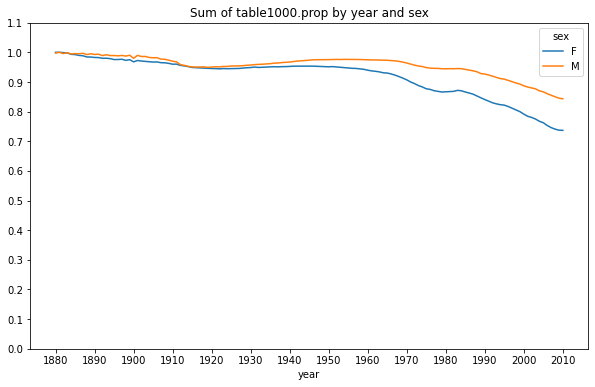

In [252]:
table.plot (yticks = np.linspace(0,1.1,12), xticks = range(1880,2020,10),
                title = 'Sum of table1000.prop by year and sex', figsize = (10,6))

In [254]:
#yıldan yıla isim çeşitliliğinde bir artış olmuştur. bir diğer ilginç
# metrik ise top %50 deki doğumlarda popülerliği yüksekten alçaya olarak farklı
#isim sayısıdır.

df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [ ]:
# prop kolonunu azalan şekilde sıraladıktan sonra, popüler isimlerden kaç tanesi
# top yüzde 50 ye girmiş ona bakıcaz.

In [255]:
prop_cumsum = df.sort_values(by = 'prop', ascending = False).prop.cumsum()

In [257]:
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [260]:
prop_cumsum.values.searchsorted(0.5) # prop oranının yüzde50 ye ulaşması için kaç tane populer isim gerektiğinin sonucunu verecek kod bloğu.

116

In [264]:
# bu işlemi 1900 senesi için yapsaydık yüzde elli eşiğine ulaşmamız için daha az 
# zaman alacaktı.
df = boys[boys['year'] == 1900]
in1900 = df.sort_values(by = 'prop', ascending = False)['prop'].cumsum()
in1900.searchsorted(0.5)

24

In [272]:
# şimdi bu operasyonu yıl ve cinsiyet bazında kombine edebiliriz.
def get_quantile_count(group, q = 0.5):
    group = group.sort_values(by = 'prop', ascending = False)['prop'].cumsum()
    return group.searchsorted(q)

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity =diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,37,13
1881,37,13
1882,37,14
1883,38,14
1884,38,15


<AxesSubplot:title={'center':'Number of popular names in top %50'}, xlabel='2010'>

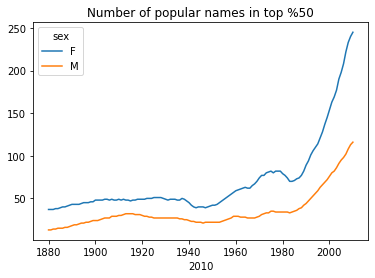

In [273]:
# bunu plota dökelim
diversity.plot(title = 'Number of popular names in top %50', xlabel = year)

### The 'last letter' revolution

In [282]:
# araştırmalar erkek isimlerindeki son harflerin yıldan yıla değiştiğini
# söylüyormuş. Elimizdeki veriyle bunu kontrol edelim
# Bunun için elimizdeki dataseti yıl cinsiyet ve son harfe göre gruplayalım
get_last_letter = lambda x : x[-1] #son harfi almak için bir lambda
last_letters = names['name'].apply(get_last_letter) #son harf
last_letters['name'] = 'last_letter'

table = names.pivot_table('births', index = last_letters, columns =['sex','year'],
                         aggfunc = sum)

subtable = table.reindex(columns=[1910, 1960, 2010], level = 'year')
subtable[:10]

sex          F                            M                    
year      1910      1960      2010     1910      1960      2010
name                                                           
a     108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b          NaN     694.0     450.0    411.0    3912.0   38859.0
c          5.0      49.0     946.0    482.0   15476.0   23125.0
d       6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e     133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f          NaN      20.0      97.0    152.0    9224.0    2255.0
g         57.0     318.0     657.0    437.0   20235.0    2666.0
h      20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i        605.0   80812.0   55820.0    164.0    1286.0   42956.0
j          NaN       NaN     159.0      NaN       NaN    1459.0

In [285]:
# oran hesaplayabilmek için tablodaki toplam doğumları cinsiyet ve yıl bazında
# bulalım.

subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [287]:
letter_prop = subtable / subtable.sum() # normalize ediyoruz
letter_prop[:10]

sex          F                             M                    
year      1910      1960      2010      1910      1960      2010
name                                                            
a     0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b          NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c     0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d     0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e     0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f          NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g     0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h     0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i     0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j          NaN       NaN  0.000090       NaN       NaN  0.000769

<AxesSubplot:title={'center':'Female'}, xlabel='name'>

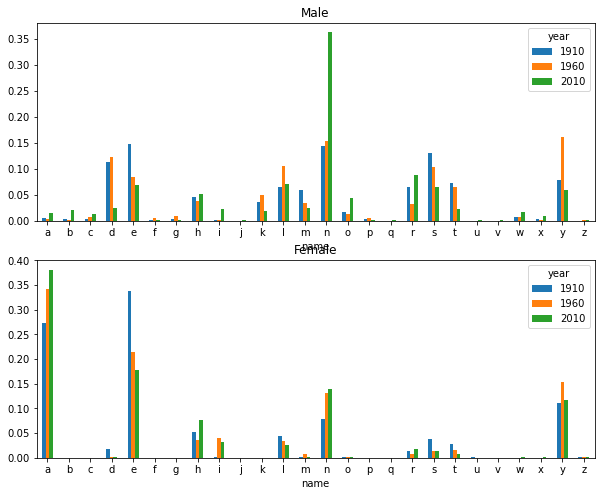

In [290]:
# elimizdeki harflerle her bir cinsiyet için yıllara göre barplot yapabiliriz.
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1, figsize=(10,8))
letter_prop['M'].plot(kind = 'bar', rot = 0, ax = axes[0], title= 'Male')
letter_prop['F'].plot(kind= 'bar', rot = 0, ax= axes[1], title = 'Female')

#### Boy names that became girl names(and vice versa)

In [302]:
# Geçmişte farklı şu an farklı cinsiyete ait olan isimler üzerine bir örnek
all_names = pd.Series(top1000['name'].unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [303]:
# isimlere göre gruplayıp doğumlarının toplamına göre filtereleyelim.
filtered = top1000[top1000['name'].isin(lesley_like.values)]

In [304]:
filtered.groupby('name')['births'].sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [311]:
# şimdi cinsiyet ve yıla göre normalize edelim
table = filtered.pivot_table('births', index = 'year', columns = 'sex', aggfunc = 'sum')

table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2006,4166.0,NaN
2007,3805.0,NaN
2008,3022.0,NaN


In [312]:
table = table.div(table.sum(1), axis = 0)
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN


<AxesSubplot:xlabel='year'>

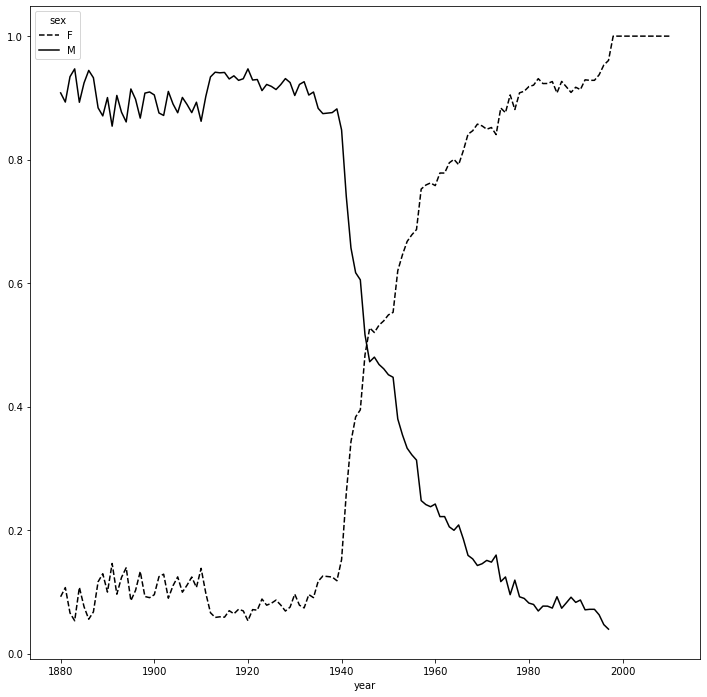

In [314]:
table.plot(style = {'M': 'k-', 'F': 'k--'}, figsize = (12,12))